#  Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#  Load the data 

In [28]:
# Load the xlsx data 
xls = pd.ExcelFile('Leda.Health.Internship.xlsx')

In [29]:
# select the raw_sheet 
raw_df=pd.read_excel(xls, 'raw').drop(columns='Unnamed: 0')

In [30]:
# shape of the data  942 rows and 40 columns
raw_df.shape

(942, 39)

In [31]:
# first 5 rows # we can see the first two rows are the information 
# which should not belong to this table  
raw_df.head()

,#,age,are.you.a.survivor.of.sexual.assault?,are.you.located.in.the.united.states?,what.gender.do.you.identify.as?,gender.other,how.is.covid-19.affecting.your.mental.health?.i.feel,currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,...,if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?,do.you.trust.the.police?,if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?,ethnicity,sexual.orientation,sexual.orientation.other,if.you've.finished.this.survey.please.type.in.the.code:.hb1495.on.mturk.and.click.yes.here,start.date.utc,submit.date.utc,network.id
0,leda.survey.covid.sexual.assault.20200418.raw.map,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Map Pulled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#,Age,Are you a survivor of sexual assault?,Are you located in the United States?,What gender do you identify as?,Gender.Other,How is COVID-19 affecting your mental health? ...,"Currently, are you willing to leave the house ...",Hospitals should prioritize COVID-19 Patients ...,The government is doing a great job with handl...,...,"If you are a survivor of sexual assault, would...",Do you trust the police?,If you were assaulted during the ongoing pande...,Ethnicity,Sexual Orientation,Sexual.Orientation.Other,"If you've finished this survey, please type in...",Start Date (UTC),Submit Date (UTC),Network ID
3,13lxbntsedxi5113lxbntatow9cnecoq,18 - 24,Yes,Yes,Female,None,Slightly better,Probably yes,Probably yes,Absolutely disagree,...,Unsure,Definitely no,Unsure,White,Bisexual,None,1,43936.6,43936.6,e4c34f4d22
4,w72a91vjf1z00mkw72a9e197ghuur3oi,55 - 74,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.6,43936.6,8b8e5dd3c5


# Data Cleaning 

## Remove first 4 rows which only contian None 


In [93]:
##remove first 4 rows which contian none 
# select all the data from 4th row  and named the data as df (dataframe)
df=raw_df.iloc[3:]
df.head()

,#,age,are.you.a.survivor.of.sexual.assault?,are.you.located.in.the.united.states?,what.gender.do.you.identify.as?,gender.other,how.is.covid-19.affecting.your.mental.health?.i.feel,currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,...,if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?,do.you.trust.the.police?,if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?,ethnicity,sexual.orientation,sexual.orientation.other,if.you've.finished.this.survey.please.type.in.the.code:.hb1495.on.mturk.and.click.yes.here,start.date.utc,submit.date.utc,network.id
3,13lxbntsedxi5113lxbntatow9cnecoq,18 - 24,Yes,Yes,Female,None,Slightly better,Probably yes,Probably yes,Absolutely disagree,...,Unsure,Definitely no,Unsure,White,Bisexual,None,1,43936.6,43936.6,e4c34f4d22
4,w72a91vjf1z00mkw72a9e197ghuur3oi,55 - 74,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.6,43936.6,8b8e5dd3c5
5,nsdw23asvr55o1o972nsdwn8v4390r8d,35 - 44,Yes,Yes,Female,None,Neutral,Definitely no,Definitely yes,Absolutely disagree,...,Definitely yes,Definitely no,Definitely yes,Black or African American,Bisexual,None,1,43936.3,43936.3,16aaf02f56
6,a7xiz4awu64lblsbna7xiphbhstrfxbs,25 - 34,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.3,43936.3,19163f14de
7,x2n24ppibp0ldr4j0jx2n24pgjv2poh8,35 - 44,Yes,Yes,Female,None,Slightly worse,Probably no,Definitely yes,Slightly agree,...,Definitely yes,Definitely yes,Probably yes,White,Heterosexual,None,1,43936.3,43936.3,ff34b475e9


## Question :Are you located in the united states?  

In [94]:
# check how many different unique answers in this column
df['are.you.located.in.the.united.states?'].value_counts()

Yes     606
None    332
No        1
Name: are.you.located.in.the.united.states?, dtype: int64

In [95]:
# take a look people who answered None and no 
df[df['are.you.located.in.the.united.states?']=="None"].head(10)
# we can see all rows are None, those rows(individuals) cannot provide useful information

,#,age,are.you.a.survivor.of.sexual.assault?,are.you.located.in.the.united.states?,what.gender.do.you.identify.as?,gender.other,how.is.covid-19.affecting.your.mental.health?.i.feel,currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,...,if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?,do.you.trust.the.police?,if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?,ethnicity,sexual.orientation,sexual.orientation.other,if.you've.finished.this.survey.please.type.in.the.code:.hb1495.on.mturk.and.click.yes.here,start.date.utc,submit.date.utc,network.id
4,w72a91vjf1z00mkw72a9e197ghuur3oi,55 - 74,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.6,43936.6,8b8e5dd3c5
6,a7xiz4awu64lblsbna7xiphbhstrfxbs,25 - 34,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.3,43936.3,19163f14de
10,ejsuuidlybv9waejscmb194eahlcct1o,35 - 44,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.2,43936.2,c98ed0cabd
13,jelevvyim9o3qapxj2u1jeleynti64ci,25 - 34,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.2,43936.2,7841cbfe7a
17,groeq46zvwweytqk2gvgroeq4hq4snu5,35 - 44,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936.1,43936.1,3f38f16596
18,nah6n47i88fnb948pqznah6au0kzn2ld,25 - 34,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43936,43936,2c0d999285
21,xnx2bi9drdxsh3u4mmchxnx2biibtkj3,35 - 44,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43935.9,43935.9,080db01c30
22,sac6py2s66dzm89bpfsac6pyyihydva8,45 - 54,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43935.9,43935.9,b27fd5a34a
23,07jepzh1t6007jez7w4zaqvmt80yz7w4,25 - 34,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43935.9,43935.9,3eef90bf22
24,qlbcrckxvzoahz3lgqlb67lwqgnl0as5,55 - 74,No,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43935.9,43935.9,0a77a7c057


In [96]:
# only one person answered "No"  and besides frist two questions he/she did not answer other questions
# it also cannot provide more useful information 
df[df['are.you.located.in.the.united.states?']=="No"] 

,#,age,are.you.a.survivor.of.sexual.assault?,are.you.located.in.the.united.states?,what.gender.do.you.identify.as?,gender.other,how.is.covid-19.affecting.your.mental.health?.i.feel,currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,...,if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?,do.you.trust.the.police?,if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?,ethnicity,sexual.orientation,sexual.orientation.other,if.you've.finished.this.survey.please.type.in.the.code:.hb1495.on.mturk.and.click.yes.here,start.date.utc,submit.date.utc,network.id
536,b4al0pri57bn3ikp0o81b4al0meoh40s,25 - 34,Yes,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,43923.6,43923.6,d3eedd8ad2


In [446]:
# remove the data of individuals who are not in the USA or whose answers are None 
# and since all 
new_df=df[df['are.you.located.in.the.united.states?']=='Yes'].drop(columns='are.you.located.in.the.united.states?')
new_df.head()

,#,age,are.you.a.survivor.of.sexual.assault?,what.gender.do.you.identify.as?,gender.other,how.is.covid-19.affecting.your.mental.health?.i.feel,currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,do.you.have.a.partner?,...,if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?,do.you.trust.the.police?,if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?,ethnicity,sexual.orientation,sexual.orientation.other,if.you've.finished.this.survey.please.type.in.the.code:.hb1495.on.mturk.and.click.yes.here,start.date.utc,submit.date.utc,network.id
3,13lxbntsedxi5113lxbntatow9cnecoq,18 - 24,Yes,Female,None,Slightly better,Probably yes,Probably yes,Absolutely disagree,Yes,...,Unsure,Definitely no,Unsure,White,Bisexual,None,1,43936.6,43936.6,e4c34f4d22
5,nsdw23asvr55o1o972nsdwn8v4390r8d,35 - 44,Yes,Female,None,Neutral,Definitely no,Definitely yes,Absolutely disagree,None,...,Definitely yes,Definitely no,Definitely yes,Black or African American,Bisexual,None,1,43936.3,43936.3,16aaf02f56
7,x2n24ppibp0ldr4j0jx2n24pgjv2poh8,35 - 44,Yes,Female,None,Slightly worse,Probably no,Definitely yes,Slightly agree,Yes,...,Definitely yes,Definitely yes,Probably yes,White,Heterosexual,None,1,43936.3,43936.3,ff34b475e9
8,t8pk13lonuvaje4ja408t8pkqadn85h5,35 - 44,Yes,Female,None,Slightly worse,Probably no,Probably yes,Neither,Yes,...,Probably yes,Slightly yes,Probably yes,White,Heterosexual,None,1,43936.2,43936.2,1f8919b553
9,qjgl8f3k04vqjg5r8tmua7dkce07j2ym,55 - 74,Yes,Female,None,Neutral,Probably yes,Probably yes,Neither,Yes,...,Probably no,Definitely yes,Definitely yes,White,Heterosexual,None,1,43936.2,43936.2,ea2f4147ec


## Gender 

In [447]:
# there are two columns contains the information of gender 
new_df['gender.other'].value_counts() 
# most cells in this column are None and only 4 people answered 
# useful information is only 0.66% of total 
new_df.drop(columns='gender.other',inplace=True)

## 'partner. other'  and  'sexual.orientation.other',

In [448]:
new_df['partner.other'].value_counts() # most people did not answer those two question 
new_df.drop(columns=['partner.other','sexual.orientation.other'],inplace=True)

## Re-categorize  "answers" 

In [449]:
new_df.columns

Index(['#', 'age', 'are.you.a.survivor.of.sexual.assault?',
       'what.gender.do.you.identify.as?',
       'how.is.covid-19.affecting.your.mental.health?.i.feel',
       'currently.are.you.willing.to.leave.the.house.to.see.a.doctor?',
       'hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients',
       'the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic',
       'do.you.have.a.partner?',
       'how.is.covid-19.affecting.your.partner's.mental.health?.they.feel',
       'have.you.and.your.partner.been.fighting.more.frequently.since.covid-19's.outbreak?',
       'has.your.partner.gotten.more.sexually.aggressive.since.covid-19's.outbreak?',
       'are.you.currently.experiencing.partner.on.partner.abuse?',
       'are.you.currently.experiencing.sexual.assault?',
       'have.you.previously.experienced.sexual.assault?',
       'was.the.assailant.the.same.or.opposite.sex?',
       'did.you.report.your.assault.to.the.police?', 'why.didn't.you.r

In [450]:
## re-categorize people's answers 
# for example if the answer is " yes" or " slighly yes " , those answers will be converted into " yes"
columns=list(new_df.columns)
columns.remove("why.didn't.you.report?")
columns.remove('if.you.answered.no.what.did.you.feel?')
for col in columns[3:-4]:
    print(list(set(new_df[col]))) # we can see there are 15 target columns 

['None', 'Male', 'Female']
['Much better', 'Slightly better', 'Much worse', 'Slightly worse', 'Neutral']
['Definitely no', 'Probably yes', 'Definitely yes', 'Neutral', 'Probably no']
['Definitely no', 'Probably yes', 'Definitely yes', 'Neutral', 'Probably no']
['Neither', 'Absolutely agree', 'Slightly disagree', 'Absolutely disagree', 'Slightly agree']
['None', 'No', 'Yes']
['Much better', 'None', 'Slightly better', 'Much worse', 'Slightly worse', 'Neutral']
['Much more', 'Neutral', 'None', 'Slightly more', 'Slightly less', 'Much less']
['Much more', 'None', 'Slightly more', 'Slightly less', 'Much less', 'No change']
['None', 'No', 'Yes', 'Prefer not to say']
['None', 'No', 'Yes', 'Prefer not to say']
['No', 'Yes', 'Prefer not to say']
['None', 'Same Sex', 'Opposite Sex', 'Not applicable']
['None', 'No', 'Yes']
['None', 'No', 'Yes']
['Definitely no', 'Slightly no', 'None', 'Definitely yes', 'Slightly yes', 'Neutral']
['None', 'No', 'Yes']
['Definitely no', 'None', 'Probably yes', 'Defi

In [451]:
# filterd the columns which contian  "Slightly" or "Probably" 
re_ca_col=[]
for col in columns[3:-4]:
    for ele in set(new_df[col]):
        if "Slightly" in ele or "Probably" in ele:
            re_ca_col.append(col)
len(set(re_ca_col)) # double check it have the same length  

15

In [452]:
# def remove=(col):
remove_list=['Definitely','Probably','Slightly','Much','Absolutely']

def remove_adverb(col):
    
    new_col=[]
    for row in new_df[col]:
        new=row.replace(remove_list[0],"").replace(remove_list[1],"").replace(remove_list[2],"").replace(remove_list[3],"").replace(remove_list[4],"")
        new_col.append(new)
    return new_col

In [453]:
# obtain a re-categorize dataframe 
for col in set(re_ca_col):
    new_df[col]=remove_adverb(col)

In [454]:
new_df.head() # frist 5 rows

,#,age,are.you.a.survivor.of.sexual.assault?,what.gender.do.you.identify.as?,how.is.covid-19.affecting.your.mental.health?.i.feel,currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,do.you.have.a.partner?,how.is.covid-19.affecting.your.partner's.mental.health?.they.feel,...,do.you.think.that.people.should.have.to.face.risks.of.going.to.the.emergency.room.to.receive.an.saek.sexual.assault.evidence.kit.where.there.are.people.who.are.sick.there?,if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?,do.you.trust.the.police?,if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?,ethnicity,sexual.orientation,if.you've.finished.this.survey.please.type.in.the.code:.hb1495.on.mturk.and.click.yes.here,start.date.utc,submit.date.utc,network.id
3,13lxbntsedxi5113lxbntatow9cnecoq,18 - 24,Yes,Female,better,yes,yes,disagree,Yes,better,...,no,Unsure,no,Unsure,White,Bisexual,1,43936.6,43936.6,e4c34f4d22
5,nsdw23asvr55o1o972nsdwn8v4390r8d,35 - 44,Yes,Female,Neutral,no,yes,disagree,None,better,...,no,yes,no,yes,Black or African American,Bisexual,1,43936.3,43936.3,16aaf02f56
7,x2n24ppibp0ldr4j0jx2n24pgjv2poh8,35 - 44,Yes,Female,worse,no,yes,agree,Yes,worse,...,Neutral,yes,yes,yes,White,Heterosexual,1,43936.3,43936.3,ff34b475e9
8,t8pk13lonuvaje4ja408t8pkqadn85h5,35 - 44,Yes,Female,worse,no,yes,Neither,Yes,worse,...,no,yes,yes,yes,White,Heterosexual,1,43936.2,43936.2,1f8919b553
9,qjgl8f3k04vqjg5r8tmua7dkce07j2ym,55 - 74,Yes,Female,Neutral,yes,yes,Neither,Yes,worse,...,Neutral,no,yes,yes,White,Heterosexual,1,43936.2,43936.2,ea2f4147ec


# EDA

## Distribitions for catogorical data 

In [424]:
# Create a function for each variable's distribution
def value_counts(df,column_name,title_size):
    # create dataframe
    dataframe=pd.DataFrame(df[column_name].value_counts()).reset_index()
    # declear x y and percentage
    x=dataframe['index']
    y=dataframe[column_name]
    percentage=[round(x/sum(dataframe[column_name]),3) for x in dataframe[column_name]]
    # graph size
    plt.figure(figsize=(15,4))

    # first graph: Frequency
    plt.subplot(1,2,1)
    plt.bar(x,y,color='b')
    plt.title(column_name.title(),fontsize=title_size)
    plt.xticks(rotation=90)
    plt.ylabel("Counts")
    for i in range(0,len(dataframe)):
        plt.text(i-0.1,y[i]+5,y[i],size=10)

    # second graph:Percentage 
    plt.subplot(1,2,2)
    plt.bar(x,percentage,color='g')
    plt.title('Percentage of Each Group',fontsize=title_size)
    plt.xticks(rotation=90)
    plt.ylabel("Percentage")
    for i in range(0,len(dataframe)):
        plt.text(i-0.1,percentage[i]+0.01,"{}%".format(round(percentage[i]*100,3)),size=10) 

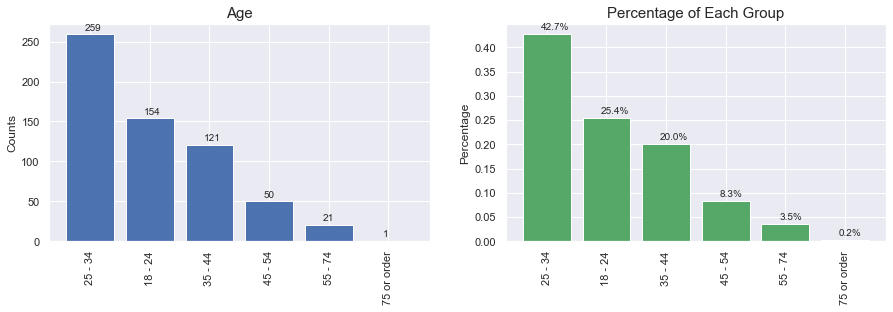

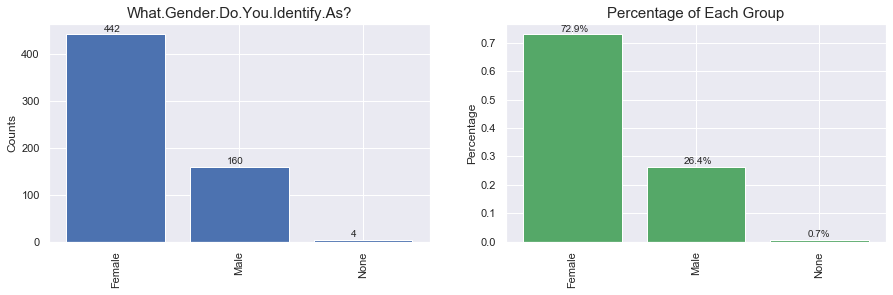

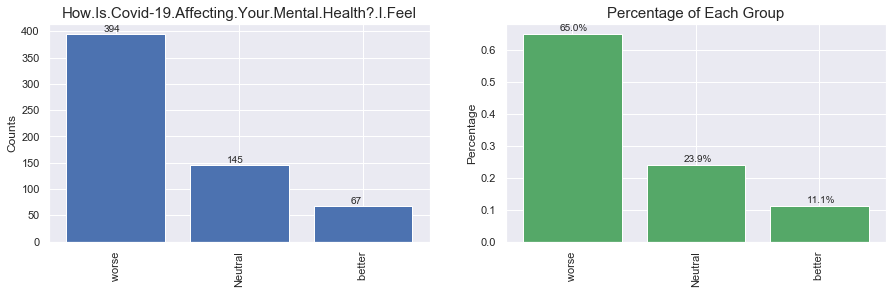

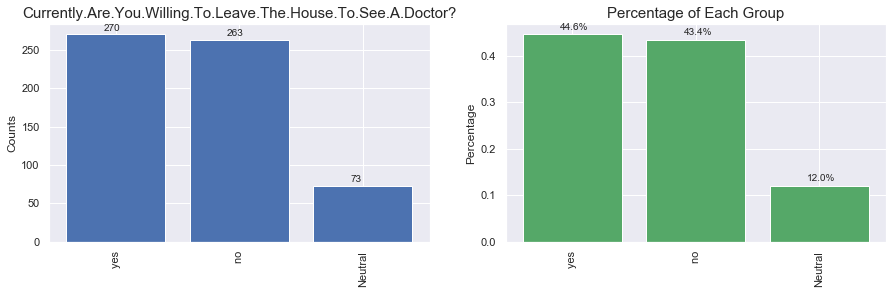

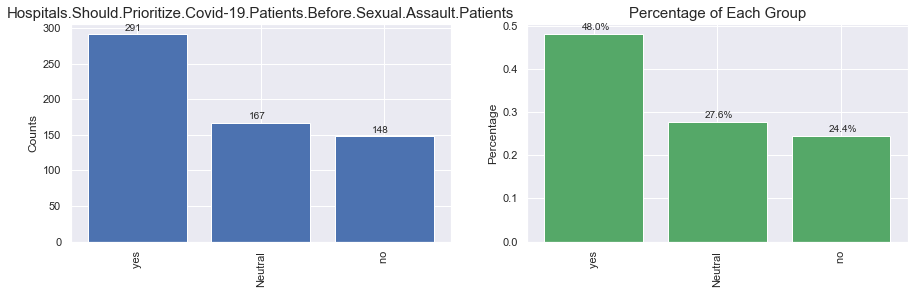

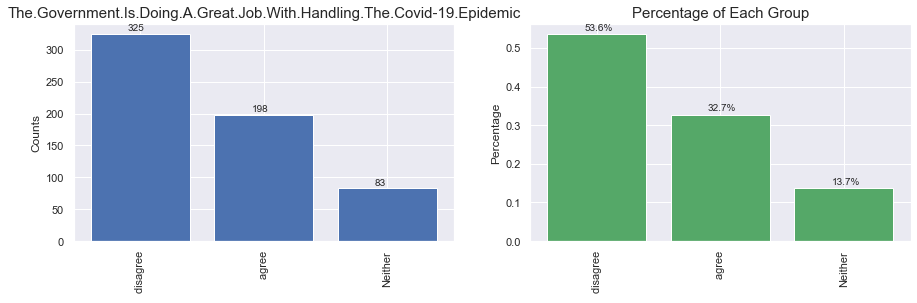

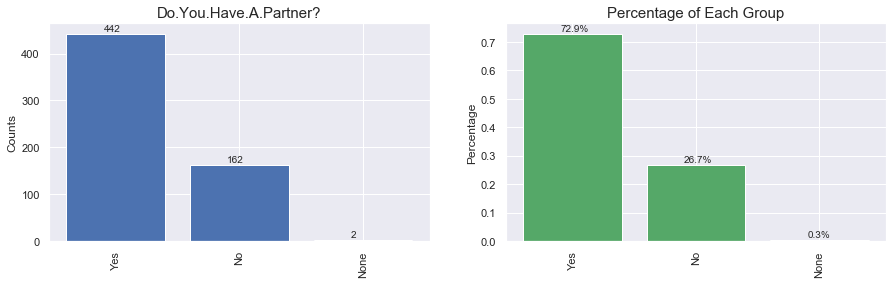

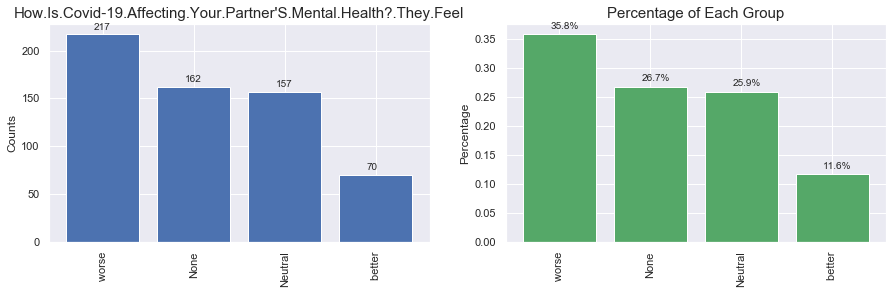

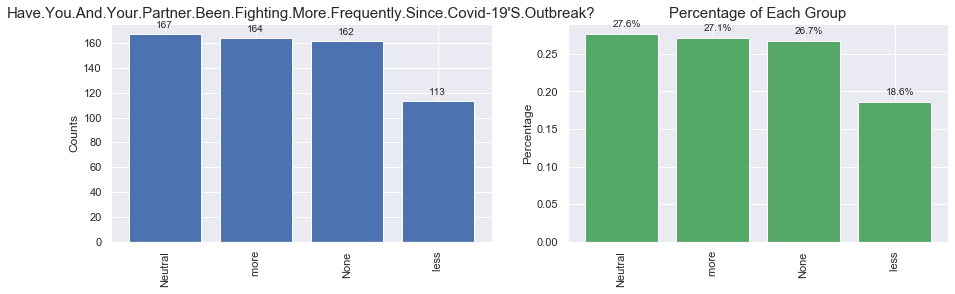

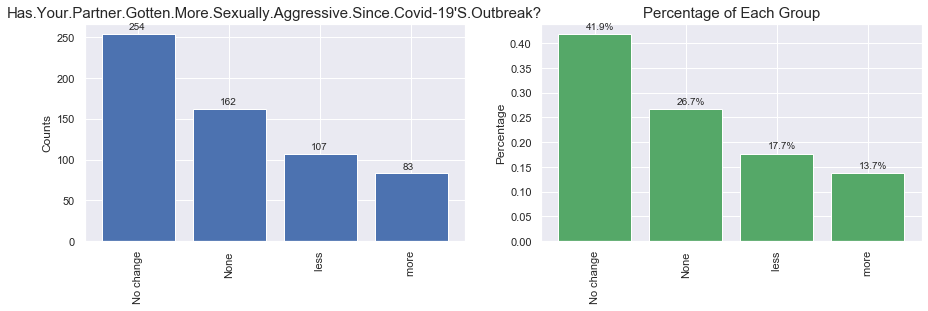

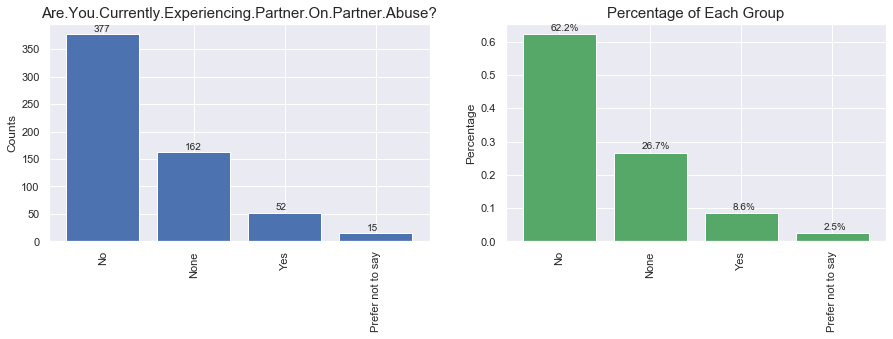

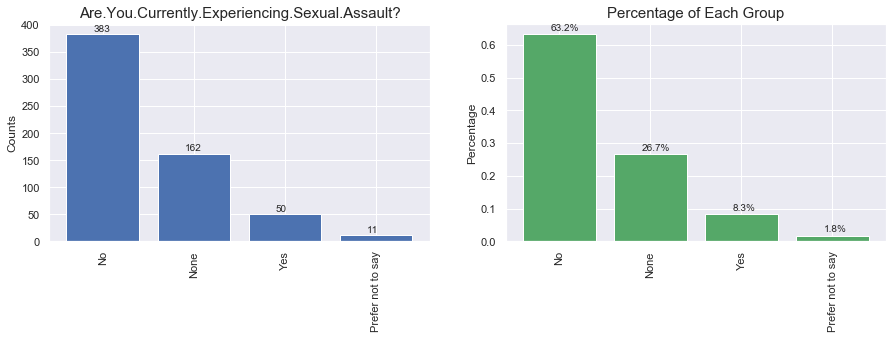

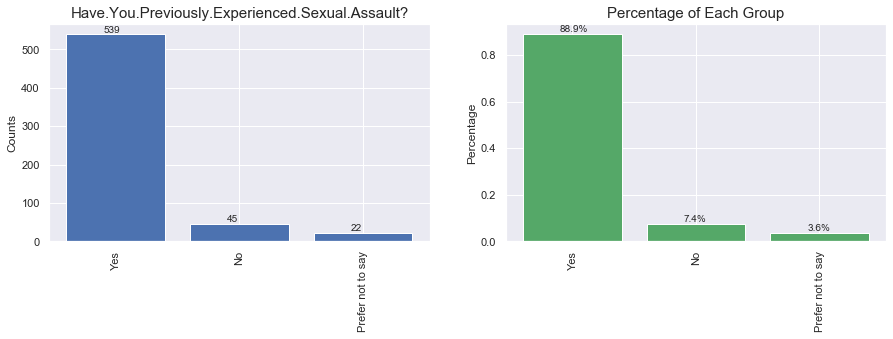

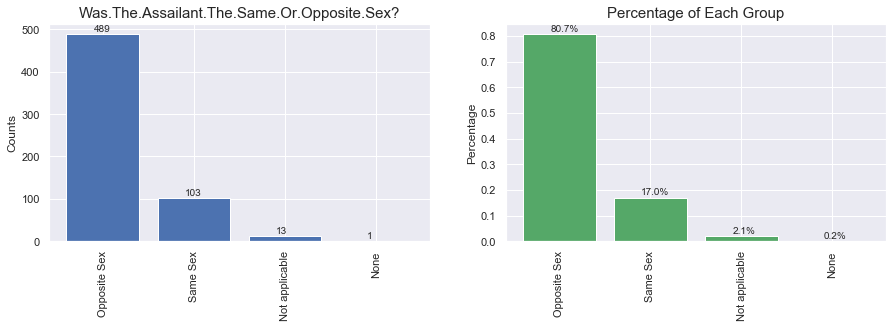

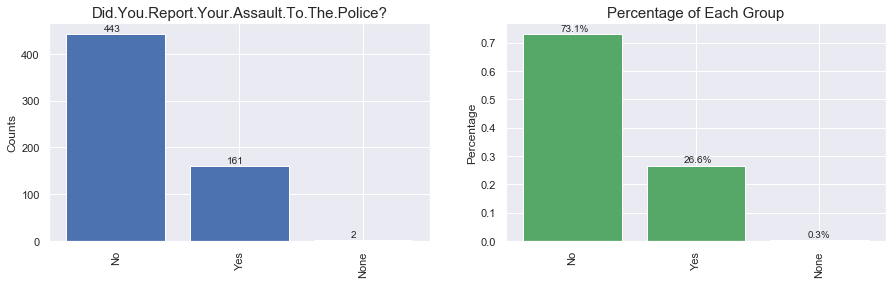

In [425]:
for i in range(1,16):
    value_counts(new_df,new_df.columns[i],15)
# 'age',
# 'what.gender.do.you.identify.as?',
# 'how.is.covid-19.affecting.your.mental.health?.i.feel',
# 'currently.are.you.willing.to.leave.the.house.to.see.a.doctor?',
# 'hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients',
# 'the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic',
# 'do.you.have.a.partner?',
# 'how.is.covid-19.affecting.your.partner's.mental.health?.they.feel',
# 'have.you.and.your.partner.been.fighting.more.frequently.since.covid-19's.outbreak?',
# 'has.your.partner.gotten.more.sexually.aggressive.since.covid-19's.outbreak?',
# 'are.you.currently.experiencing.partner.on.partner.abuse?',
# 'are.you.currently.experiencing.sexual.assault?',
# 'have.you.previously.experienced.sexual.assault?',
# 'was.the.assailant.the.same.or.opposite.sex?',
# 'did.you.report.your.assault.to.the.police?'

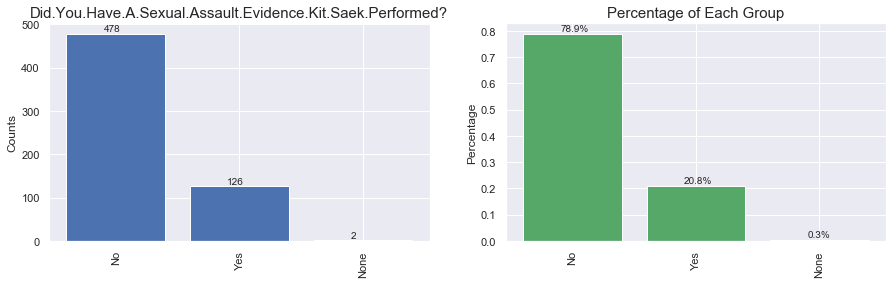

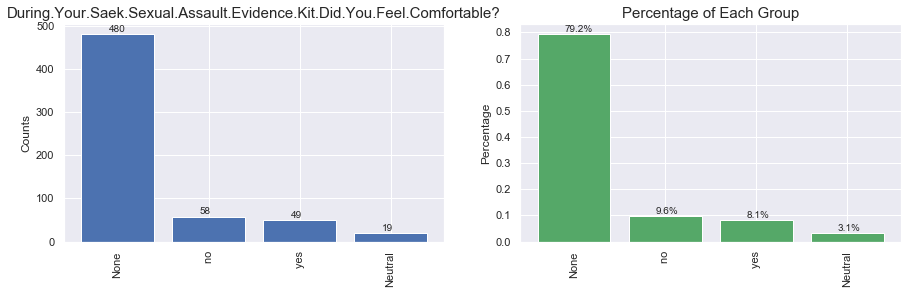

In [426]:
for i in range(17,19):
    value_counts(new_df,new_df.columns[i],15)
# 'did.you.have.a.sexual.assault.evidence.kit.saek.performed?',
# 'during.your.saek.sexual.assault.evidence.kit.did.you.feel.comfortable?',

Index(['are.you.aware.of.the.current.backlog.of.saeks.sexual.assault.evidence.kits.?',
       'do.you.think.that.all.survivors.of.sexual.assault.should.be.able.to.use.an.at-home.kit?',
       'it.would.be.useful.to.have.infographics.or.videos.to.train.survivors.how.to.use.their.at-home.kit',
       'would.you.feel.like.you.had.more.autonomy.over.your.body.as.a.sexual.assault.survivor.if.you.could.perform.an.saek.sexual.assault.evidence.kit.on.yourself?',
       'do.you.think.that.people.should.have.to.face.risks.of.going.to.the.emergency.room.to.receive.an.saek.sexual.assault.evidence.kit.where.there.are.people.who.are.sick.there?',
       'if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?',
       'do.you.trust.the.police?',
       'if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?',
       'ethnicity', 'sexual.orientation'],
      dtype='object')


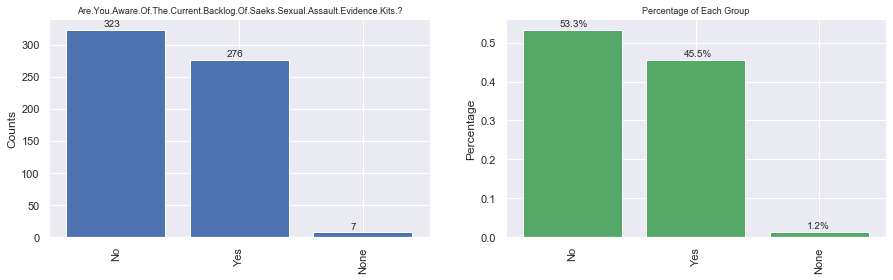

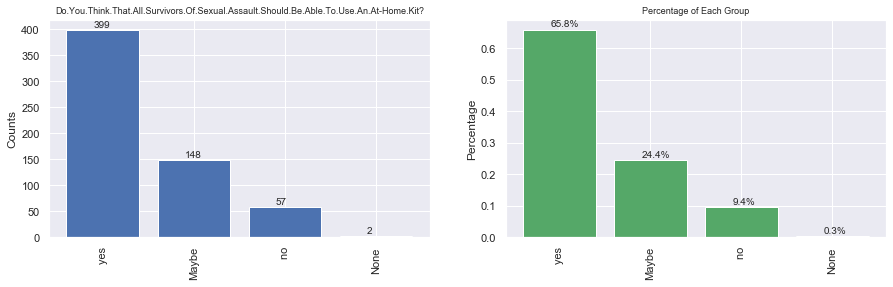

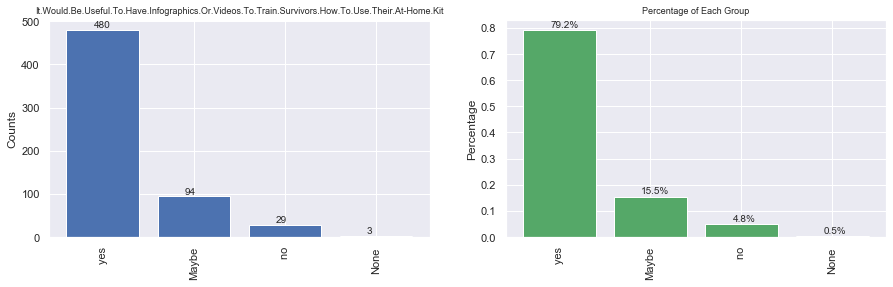

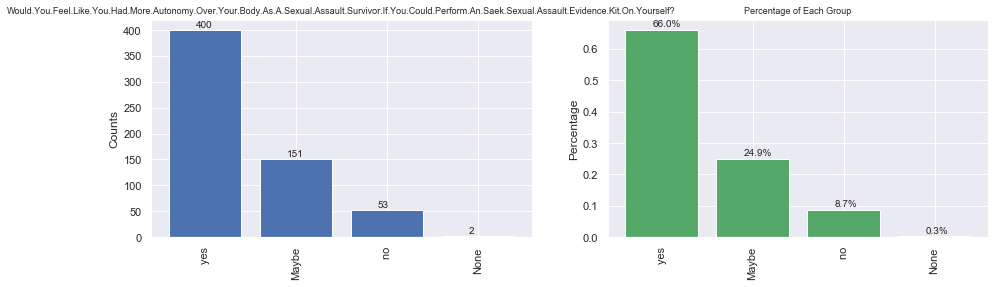

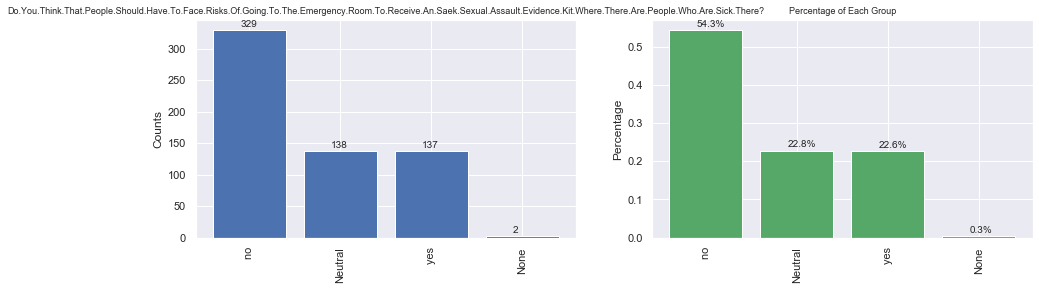

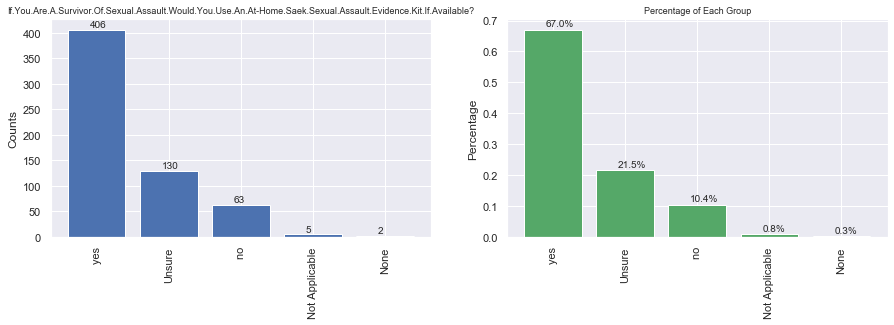

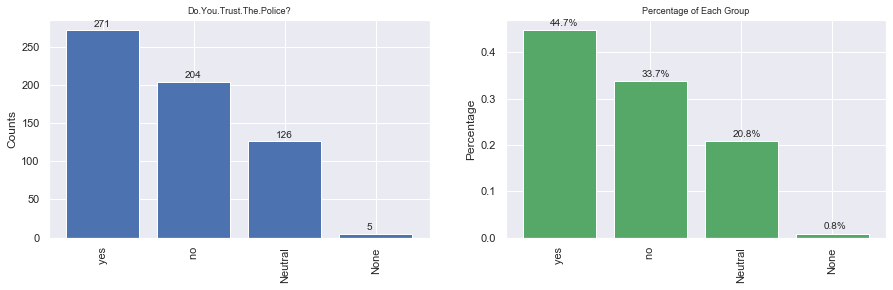

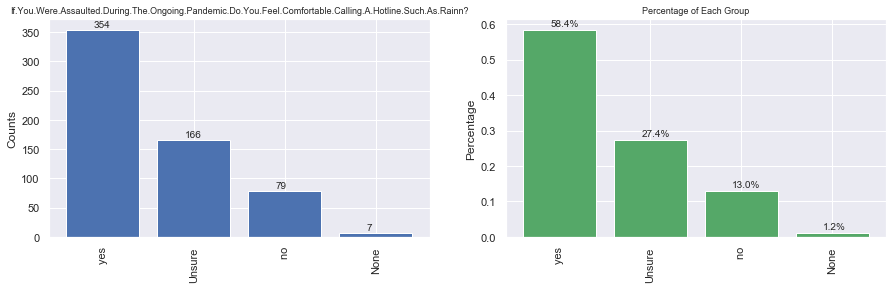

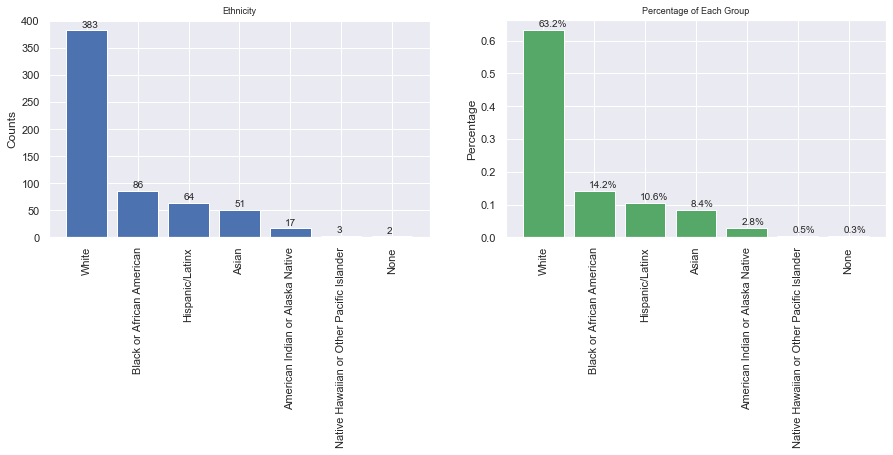

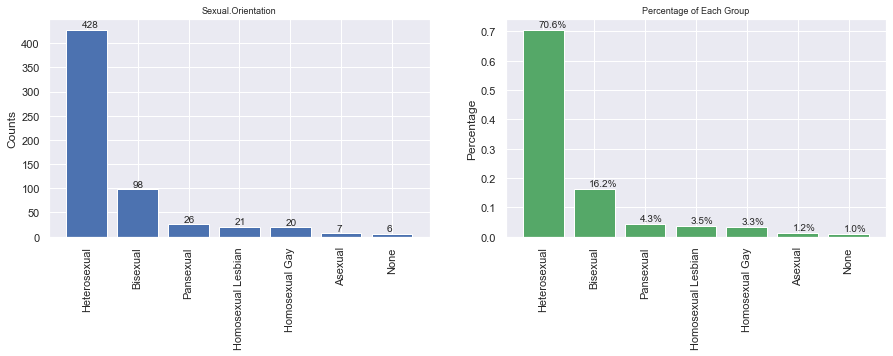

In [427]:
for i in range(20,30):
    value_counts(new_df,new_df.columns[i],9)
print(new_df.columns[20:30])    

## Text Data

### "why didn't you report?"

#### Bigrams and Trigrams

In [428]:
# column of "why.didn't.you.report?" This column contians text data: so let us see the 
# Bigram and word cloud for this columns 
new_df[new_df.columns[16]][:10]

3           Not worth it, I wouldn't have been believed
5                                                  None
7                                        Was to ashamed
8                                i was young and afraid
9                                                  None
11    I was too young and scared to let anyone know ...
12    My mom told me it would only make her look bad...
14                            Didn't want records of it
15                                      too embarrassed
16                              was along long time ago
Name: why.didn't.you.report?, dtype: object

In [429]:
# remove all None
text_list=[]
for row in new_df[new_df.columns[16]]:
    if row!="None":
        text_list.append(str(row))

In [430]:
# create function to prepare data for bigram  and trigram
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [431]:
# obtian the bigrams and trigrams data and declare x and Y 
bigrams = get_top_n_bigram(text_list, 20)
x_bigram=[x[0] for x in bigrams]
y_bigram=[x[1] for x in bigrams]

trigram = get_top_n_trigram(text_list, 20)
x_trigram=[x[0] for x in trigram]
y_trigram=[x[1] for x in trigram]

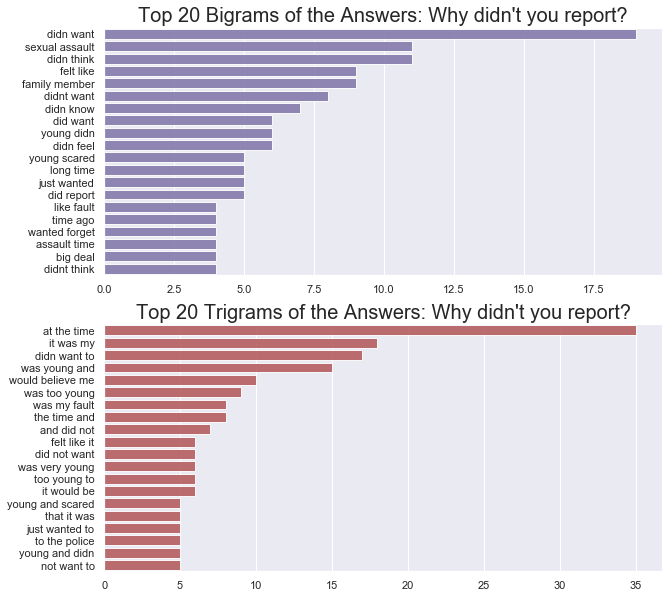

In [432]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.barplot(y_bigram,x_bigram,color='m',alpha=0.9)
plt.title("Top 20 Bigrams of the Answers: Why didn't you report?",fontsize=20)
plt.xticks(rotation=0)

plt.subplot(2,1,2)
sns.barplot(y_trigram,x_trigram,color='r',alpha=0.9)
plt.title("Top 20 Trigrams of the Answers: Why didn't you report?",fontsize=20)
plt.show()

#### Word Cloud

In [433]:
# wordcloud function
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

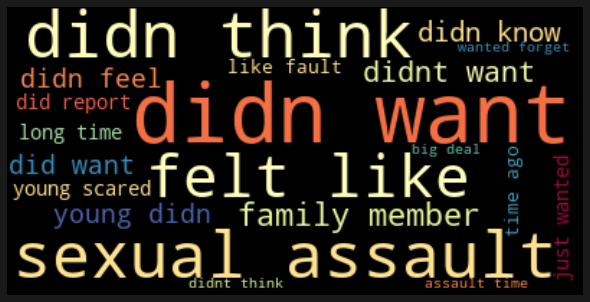

In [434]:
# create dictinary for text data
text_dictionary={}
for i in range(len(bigrams)):
    text_dictionary[bigrams[i][0]]=bigrams[i][1]
# Create the word cloud of the text data 
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(text_dictionary)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

###  'if.you.answered.no.what.did.you.feel?'  
The previous question is :

`'during.your.saek.sexual.assault.evidence.kit.did.you.feel.comfortable?'`

In [435]:
new_df['if.you.answered.no.what.did.you.feel?'].value_counts()[0:11] 
# we can see 555 None out of 606 
# but I still want to know others people's answers

None                                                                                                                         555
Scared                                                                                                                         3
Traumatized                                                                                                                    2
ashamed                                                                                                                        2
they make you feel like you are being victimise more                                                                           1
There were way too many hospital staff, police officers, and victim advocates in the room. Too much was going on at once.      1
I felt like I was broken.                                                                                                      1
violated, exposed, ashamed                                                                       

#### Bigrams and Trigrams

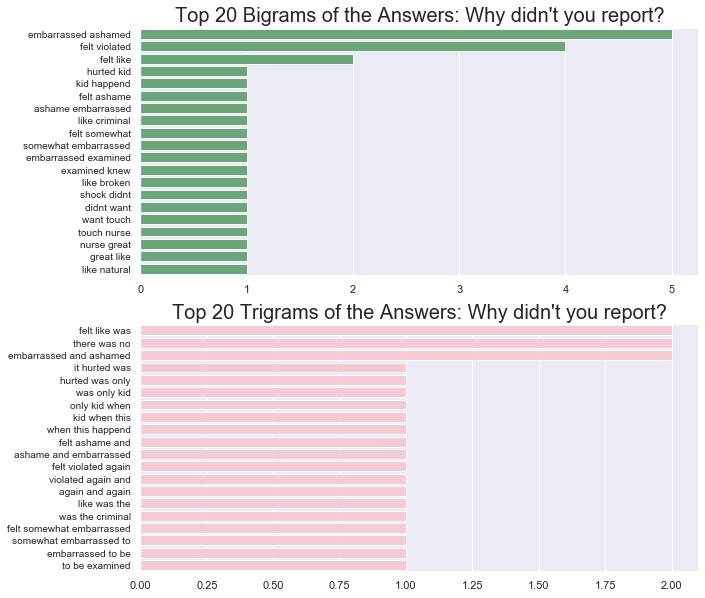

In [436]:
# recall the funtions to create the bigram1 and trigram1
bigram1 = get_top_n_bigram(df[df.columns[23]], 20)
trigram1=get_top_n_trigram(df[df.columns[23]], 20)
# decalre x and y to plot bigram and trigram
x_bigram1=[x[0] for x in bigram1]
y_bigram1=[x[1] for x in bigram1]
x_trigram1=[x[0] for x in trigram1]
y_trigram1=[x[1] for x in trigram1]

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.barplot(y_bigram1,x_bigram1,color='g',alpha=0.9)
plt.title("Top 20 Bigrams of the Answers: Why didn't you report?",fontsize=20)
plt.yticks(size=10)
plt.subplot(2,1,2)
sns.barplot(y_trigram1,x_trigram1,color='pink',alpha=0.9)
plt.title("Top 20 Trigrams of the Answers: Why didn't you report?",fontsize=20)
plt.yticks(size=10)
plt.show()

#### Word Cloud

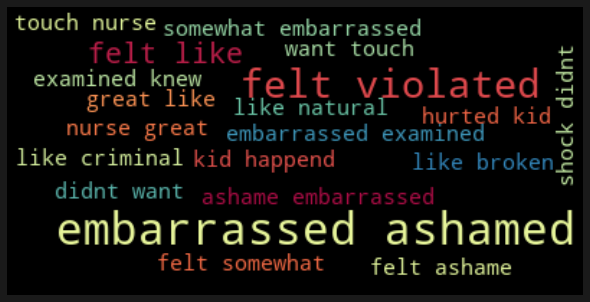

In [437]:
# create dictinary for text data
text_dictionary1={}
for i in range(len(bigram1)):
    text_dictionary1[bigram1[i][0]]=bigram1[i][1]
# Create the word cloud of the text data 
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(text_dictionary1)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# COVID_19 Insights  

In [438]:
# First, let's obtian the columns which contian COVID-19
covid_col=[col for col in new_df.columns if 'covid' in col or "COVID" in col]
covid_col
# we can see there are 6 questions about corona virous

['how.is.covid-19.affecting.your.mental.health?.i.feel',
 'hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients',
 'the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic',
 "how.is.covid-19.affecting.your.partner's.mental.health?.they.feel",
 "have.you.and.your.partner.been.fighting.more.frequently.since.covid-19's.outbreak?",
 "has.your.partner.gotten.more.sexually.aggressive.since.covid-19's.outbreak?"]

## How does COVID_19 affect people  in different ages , genders, 'ethnicity'

In [522]:
# create the function 
def create_df(col):
    data=pd.DataFrame(new_df.groupby(['age','what.gender.do.you.identify.as?','ethnicity'])[col].value_counts())
    data.columns=['counts']
    data=data.reset_index()
    return data

In [550]:
# create the function for ploting 
def plot_data(covid,topic):
    plt.figure(figsize=(20,5))
    plt.suptitle('{} : {}'.format(topic,covid.columns[-2].capitalize()), fontsize=20)

    # subplot 1: age 
    plt.subplot(1,3,1)
    sns.barplot(x="age", y="counts",
                hue=covid.columns[-2], 
                data=covid,ci=None
                )
    plt.xticks(rotation=90)
    plt.xlabel('Age')
    plt.legend(loc='best')
    # we can see the in different group most people did not fill out the survay,
    # On the other hand we can see also a lot of people feel slightly worse in first 4 groups

    # # subplot 2: gender
    plt.subplot(1,3,2)
    sns.barplot(x="what.gender.do.you.identify.as?",
                y="counts",
                hue=covid.columns[-2],
                data=covid,ci=None)
    plt.xlabel('Gender')
    plt.xticks(rotation=90)
    plt.legend(loc='best')
   
    # # subplot : ethnicity
    plt.subplot(1,3,3)
    sns.barplot(x="ethnicity",
                y="counts",
                hue=covid.columns[-2],
                data=covid,ci=None)
    plt.xlabel('ethnicity')
    plt.xticks(rotation=90)
    plt.legend(loc='best')
    plt.show()

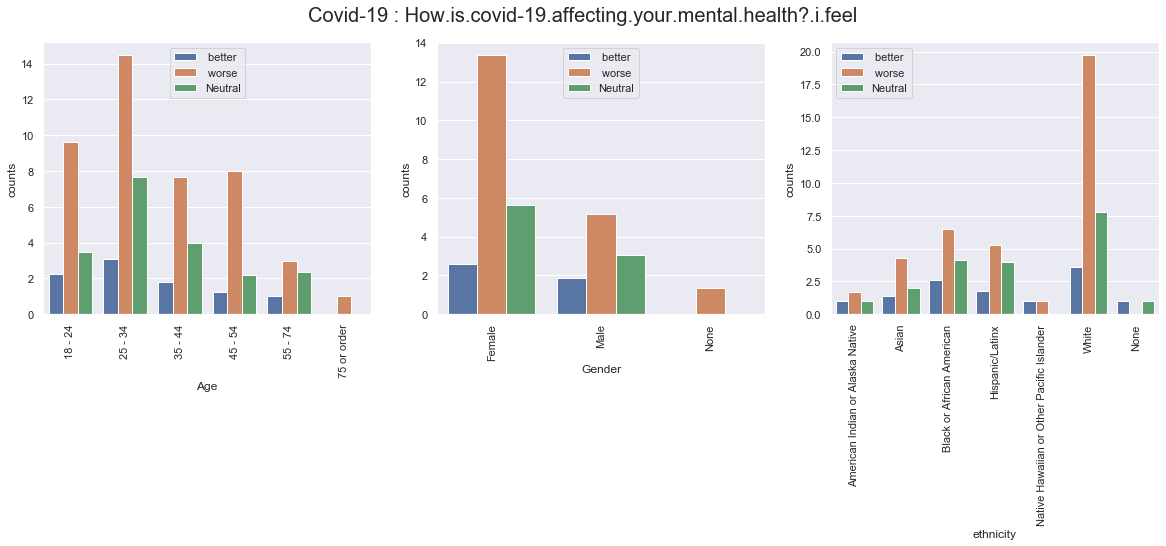

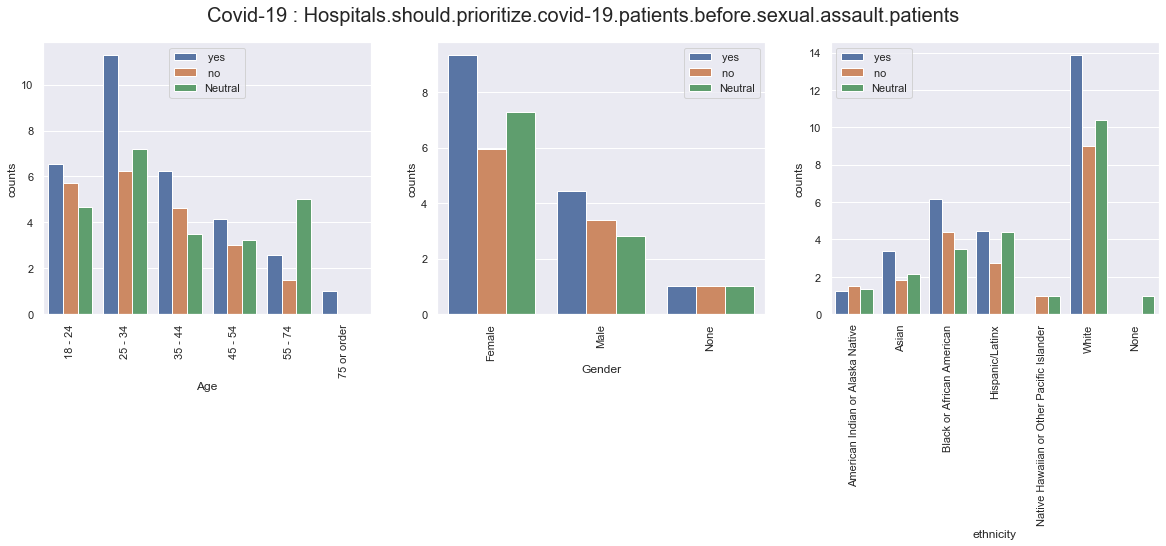

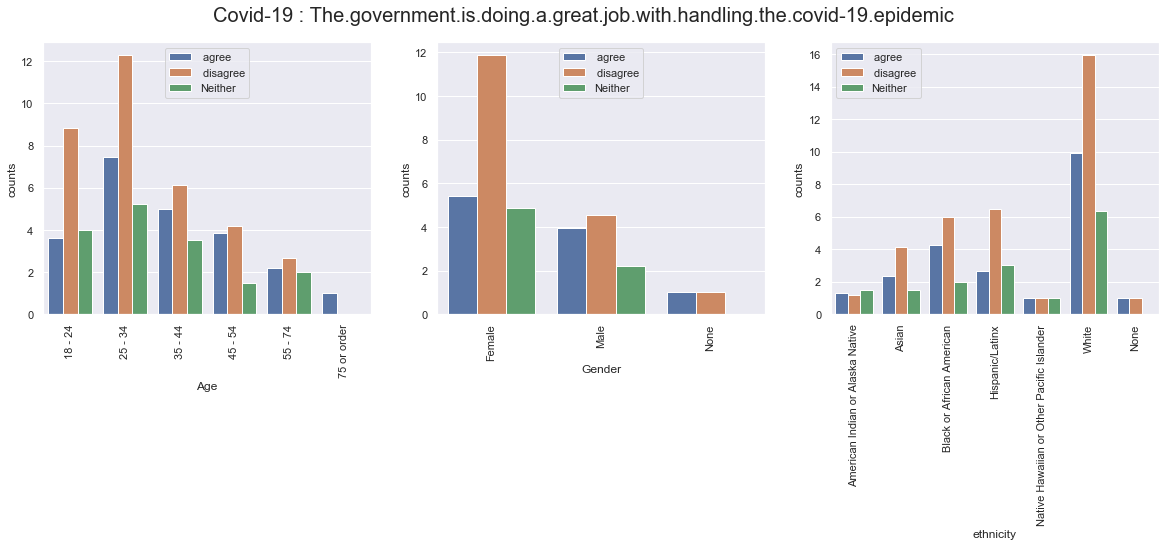

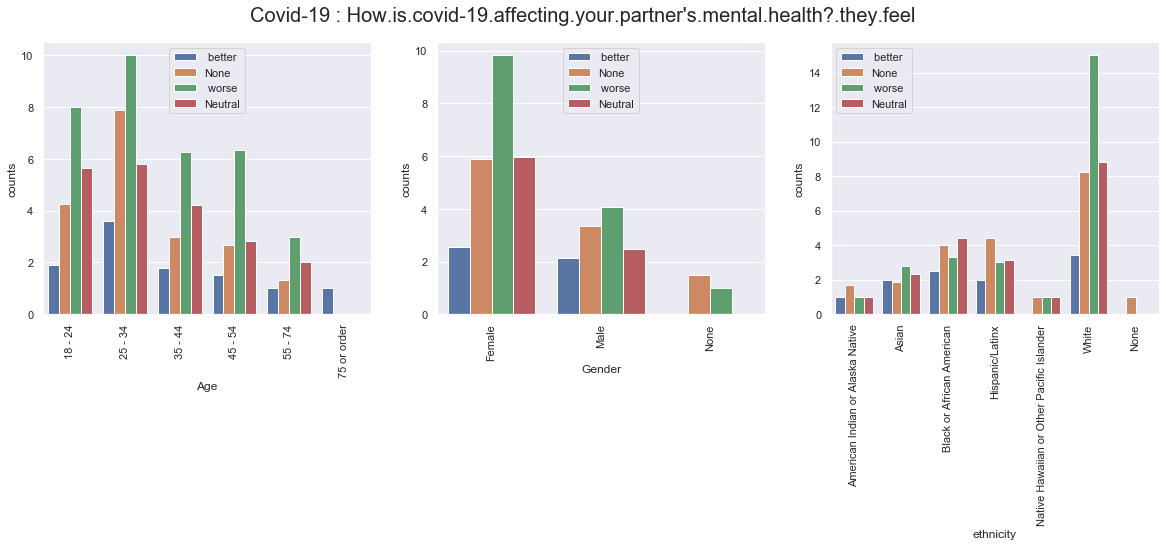

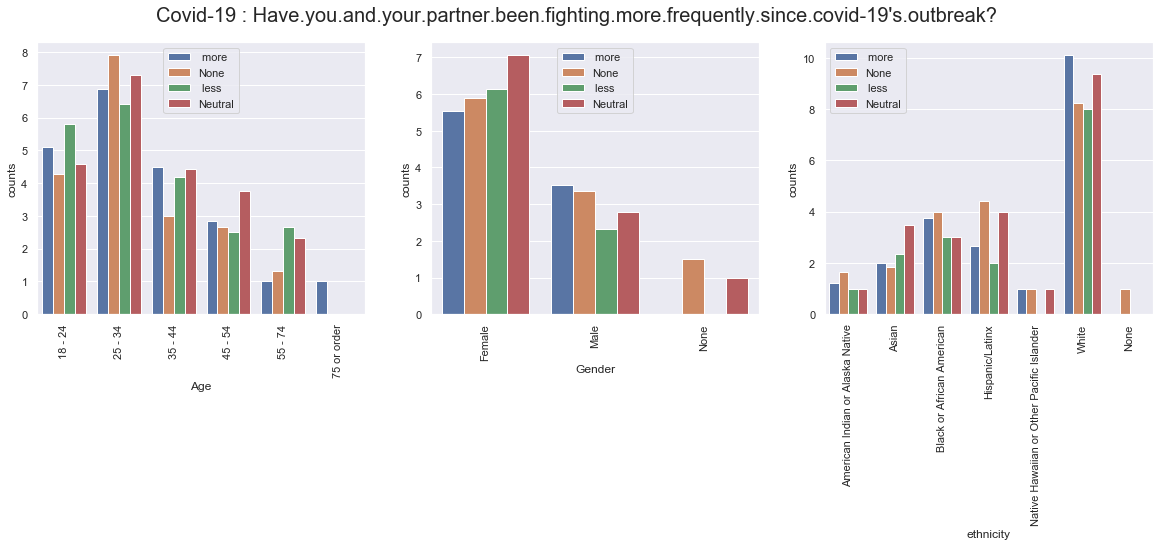

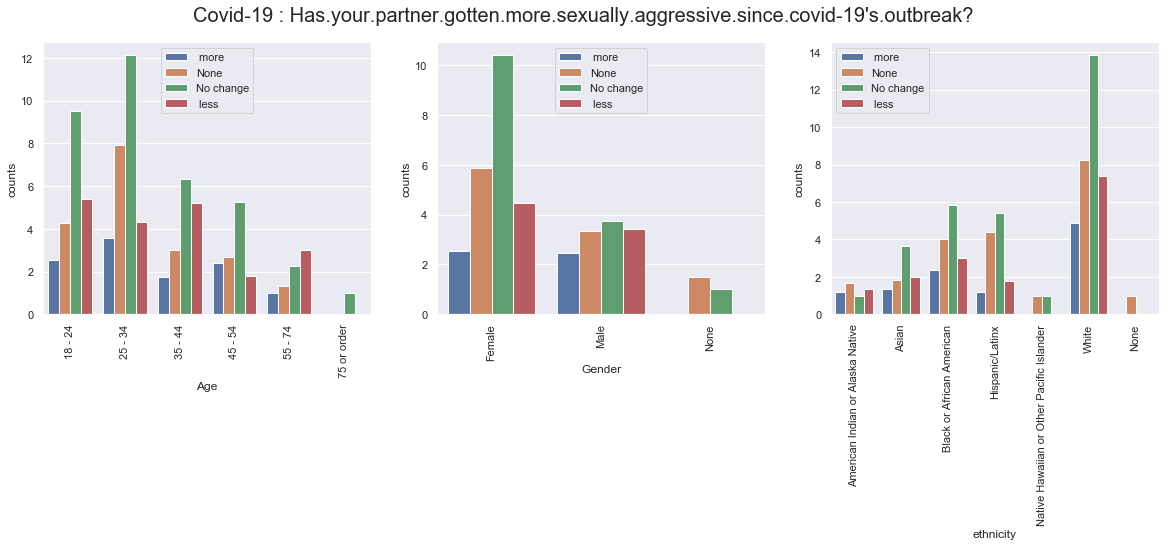

In [551]:
# create dataframe for each column in covid_col
covid1=create_df(covid_col[0])
covid2=create_df(covid_col[1])
covid3=create_df(covid_col[2])
covid4=create_df(covid_col[3])
covid5=create_df(covid_col[4])
covid6=create_df(covid_col[5])
list_cov=[covid1,covid2,covid3,covid4,covid5,covid6]
# plot the people's mental health 
for data in list_cov:
    plot_data(data,'Covid-19')

# Corrlation between each column

In [678]:
# some columns that need to drop such as ID and date etc
drop_features=['#', 'age', 'are.you.a.survivor.of.sexual.assault?',"why.didn't.you.report?",
 'if.you.answered.no.what.did.you.feel?',"if.you've.finished.this.survey.please.type.in.the.code:.hb1495.on.mturk.and.click.yes.here",
 'network.id',
 'submit.date.utc',
 'start.date.utc']
# drop features 
feature=new_df.drop(columns=drop_features) 

In [679]:
# create a function to transform the data 
from sklearn import  preprocessing
def encode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [680]:
#loop each column to convert catogorical data into numerical data 
for col in feature.columns:
    feature[col]=encode(feature[col]) 

In [681]:
feature.columns=list(range(len(feature.columns)))

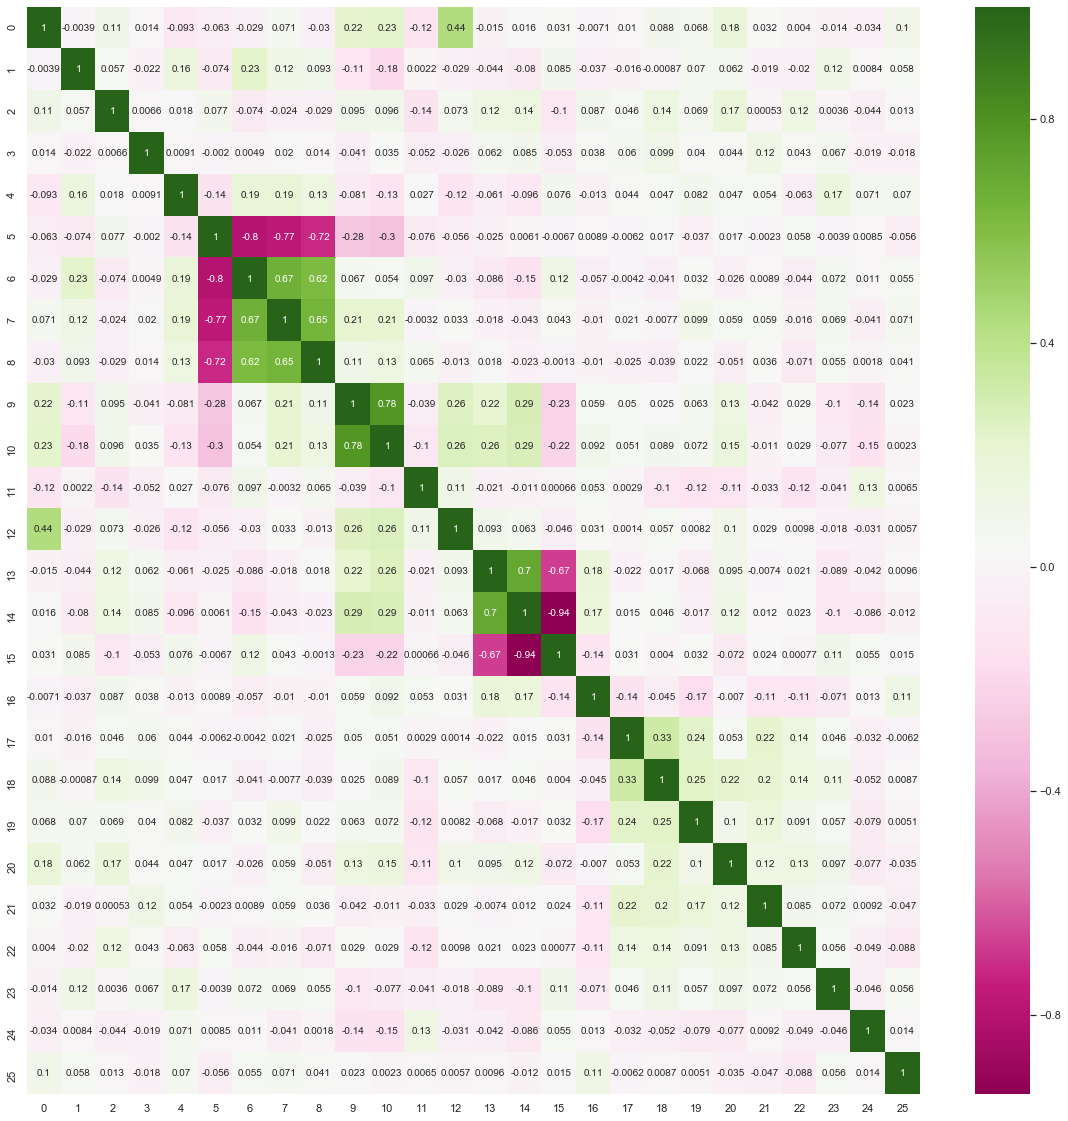

In [685]:
# Feature correlaiton heatmap
plt.figure(figsize=(20,20))
sns.heatmap(feature.corr(), annot=True,cmap="PiYG")
plt.show()

In [557]:
#Correlation with output variable
cor_target = abs(feature.corr())
# Obtianed the dataframe 
relevant_features = cor_target[cor_target>0]
#relevant_features.to_csv("feature_correlation.csv") # save as csv file 
relevant_features.head()

,what.gender.do.you.identify.as?,how.is.covid-19.affecting.your.mental.health?.i.feel,currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,do.you.have.a.partner?,how.is.covid-19.affecting.your.partner's.mental.health?.they.feel,have.you.and.your.partner.been.fighting.more.frequently.since.covid-19's.outbreak?,has.your.partner.gotten.more.sexually.aggressive.since.covid-19's.outbreak?,are.you.currently.experiencing.partner.on.partner.abuse?,...,are.you.aware.of.the.current.backlog.of.saeks.sexual.assault.evidence.kits.?,do.you.think.that.all.survivors.of.sexual.assault.should.be.able.to.use.an.at-home.kit?,it.would.be.useful.to.have.infographics.or.videos.to.train.survivors.how.to.use.their.at-home.kit,would.you.feel.like.you.had.more.autonomy.over.your.body.as.a.sexual.assault.survivor.if.you.could.perform.an.saek.sexual.assault.evidence.kit.on.yourself?,do.you.think.that.people.should.have.to.face.risks.of.going.to.the.emergency.room.to.receive.an.saek.sexual.assault.evidence.kit.where.there.are.people.who.are.sick.there?,if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?,do.you.trust.the.police?,if.you.were.assaulted.during.the.ongoing.pandemic.do.you.feel.comfortable.calling.a.hotline.such.as.rainn?,ethnicity,sexual.orientation
what.gender.do.you.identify.as?,1.000000,0.003858,0.109297,0.013547,0.093469,0.063038,0.028584,0.070854,0.029724,0.224419,...,0.007098,0.010388,0.088381,0.067525,0.175740,0.032370,0.004045,0.014191,0.033695,0.100416
how.is.covid-19.affecting.your.mental.health?.i.feel,0.003858,1.000000,0.056947,0.021610,0.156486,0.074416,0.230823,0.118606,0.092624,0.110581,...,0.037348,0.016137,0.000867,0.069928,0.062242,0.018613,0.019956,0.118453,0.008380,0.058157
currently.are.you.willing.to.leave.the.house.to.see.a.doctor?,0.109297,0.056947,1.000000,0.006639,0.018471,0.076719,0.074236,0.023970,0.029240,0.095380,...,0.086926,0.046089,0.140333,0.068859,0.174804,0.000529,0.122481,0.003614,0.043780,0.012750
hospitals.should.prioritize.covid-19.patients.before.sexual.assault.patients,0.013547,0.021610,0.006639,1.000000,0.009128,0.002016,0.004882,0.019610,0.013863,0.040531,...,0.038076,0.060189,0.099081,0.039604,0.043795,0.118136,0.043074,0.066621,0.018844,0.017710
the.government.is.doing.a.great.job.with.handling.the.covid-19.epidemic,0.093469,0.156486,0.018471,0.009128,1.000000,0.142174,0.185687,0.192964,0.130771,0.081253,...,0.012523,0.044256,0.046764,0.081688,0.047172,0.053917,0.063462,0.165543,0.070646,0.070072


# More insights of Sexual Assault

## people who are survivors of sexual assault in different age groups

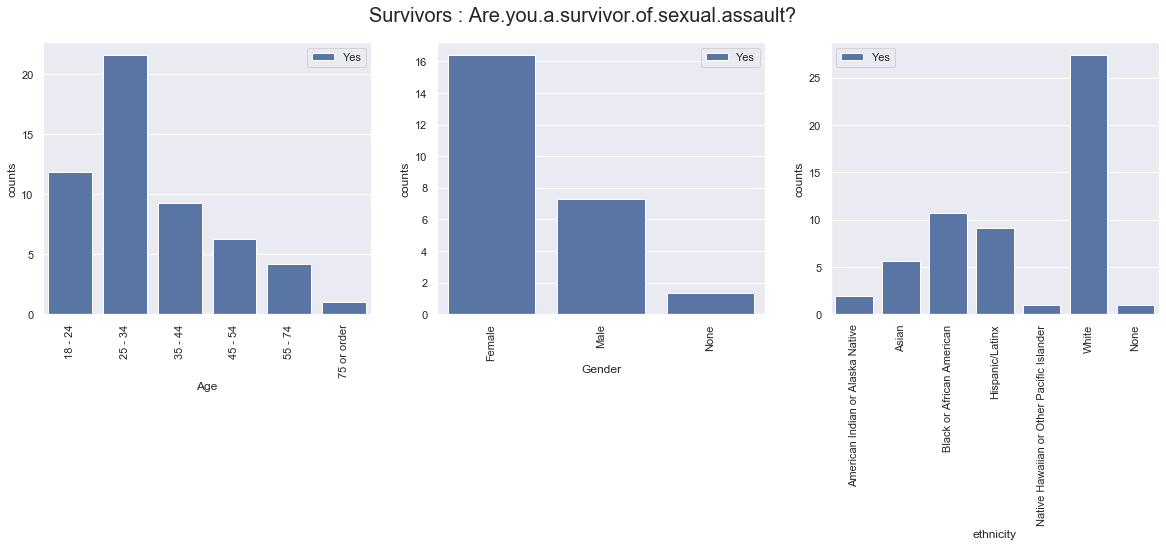

In [561]:
#recall the funtions I created before 
# all individuals in our new_df answered "yes" of the question:'are.you.a.survivor.of.sexual.assault?'
# plot survivors in different ages , genders and ethinicities
survivor=create_df('are.you.a.survivor.of.sexual.assault?')
plot_data(survivor,'Survivors')

## Opinions of sexual assault evidence kit (saek)

In [571]:
sa=[col for col in new_df.columns if 'sexual.assault.evidence.kit' in col  or "saek" in col]
sa

['did.you.have.a.sexual.assault.evidence.kit.saek.performed?',
 'during.your.saek.sexual.assault.evidence.kit.did.you.feel.comfortable?',
 'are.you.aware.of.the.current.backlog.of.saeks.sexual.assault.evidence.kits.?',
 'would.you.feel.like.you.had.more.autonomy.over.your.body.as.a.sexual.assault.survivor.if.you.could.perform.an.saek.sexual.assault.evidence.kit.on.yourself?',
 'do.you.think.that.people.should.have.to.face.risks.of.going.to.the.emergency.room.to.receive.an.saek.sexual.assault.evidence.kit.where.there.are.people.who.are.sick.there?',
 'if.you.are.a.survivor.of.sexual.assault.would.you.use.an.at-home.saek.sexual.assault.evidence.kit.if.available?']

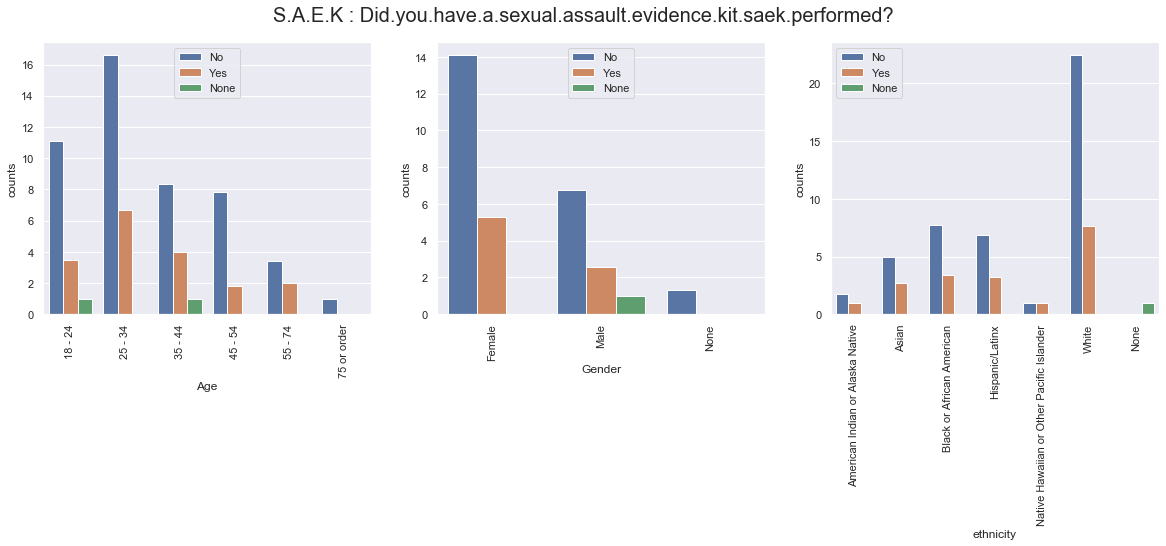

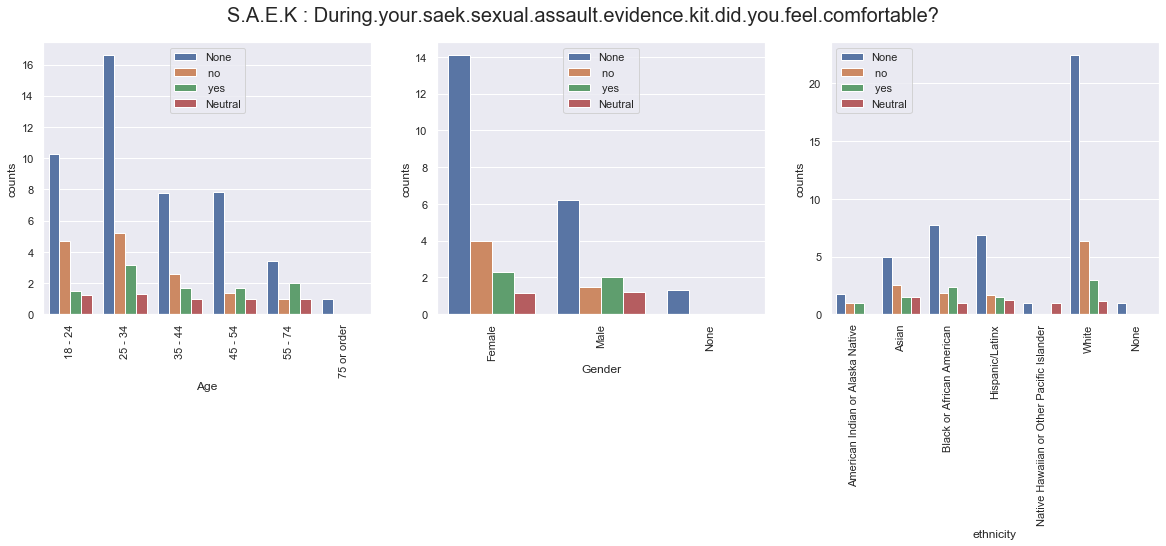

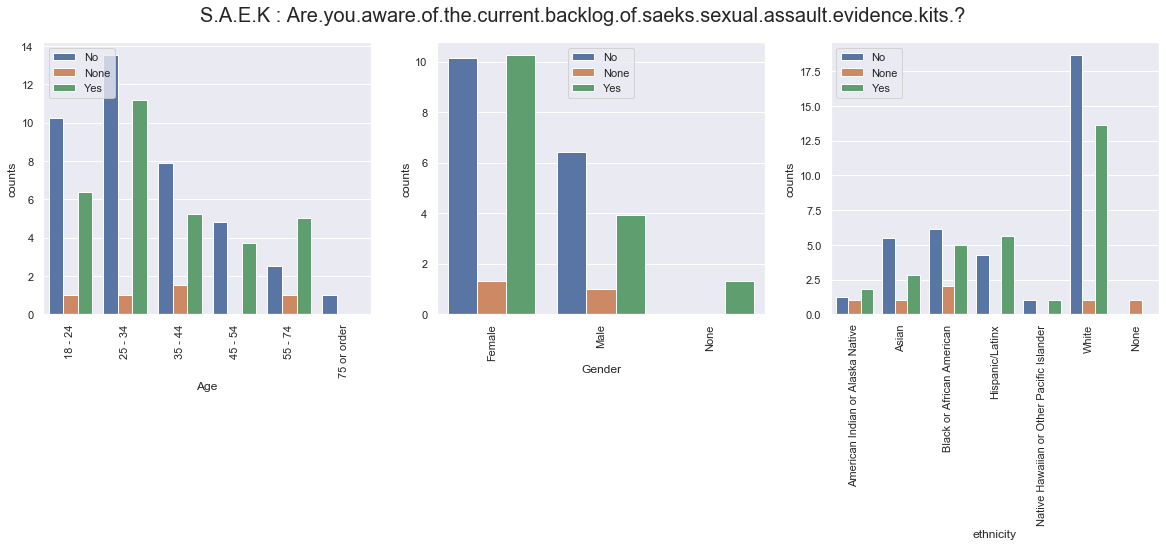

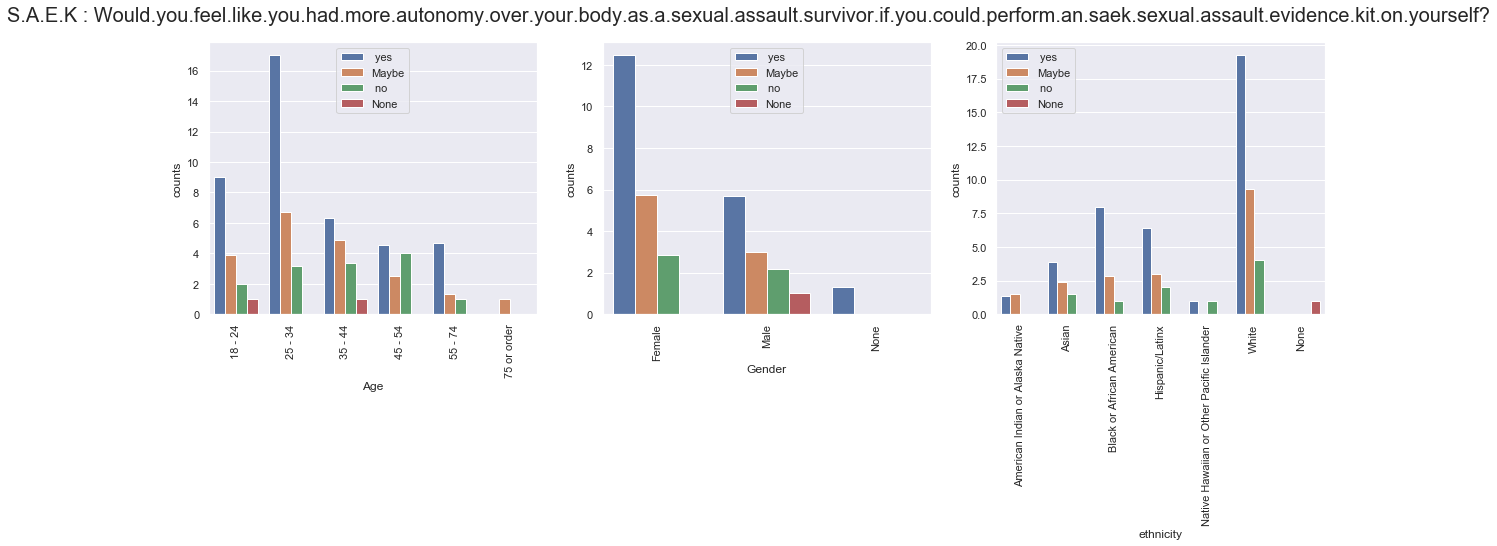

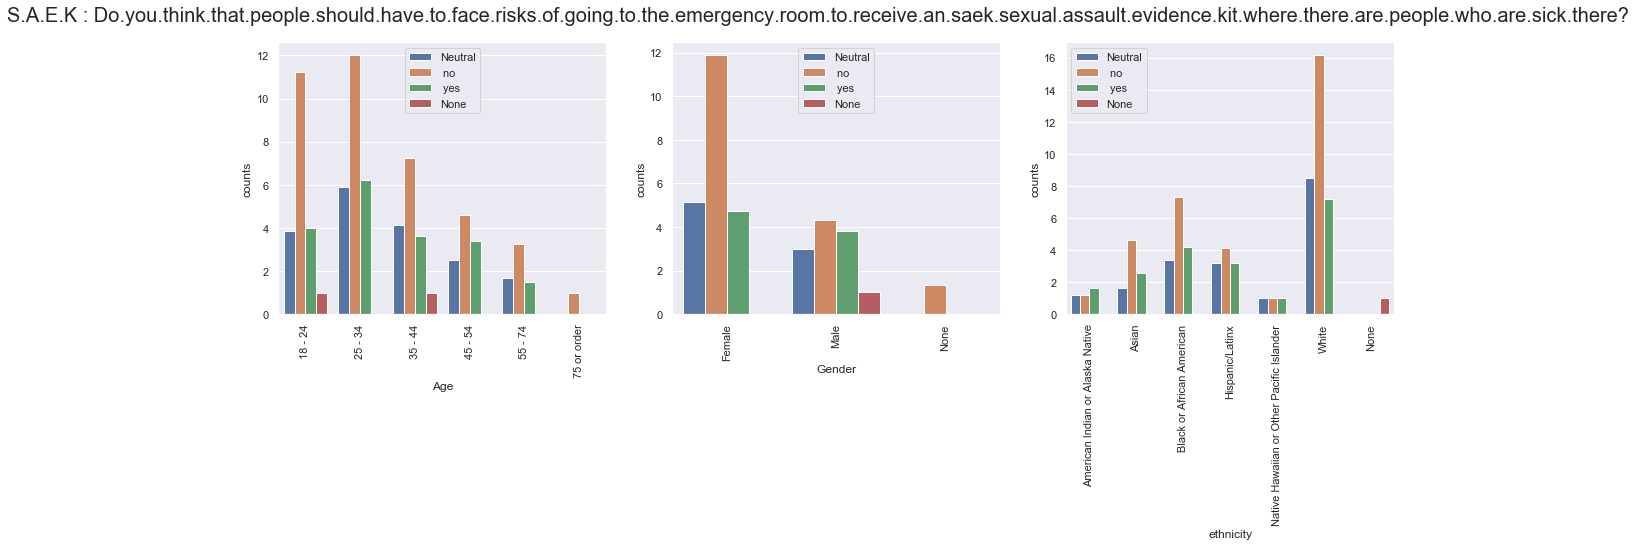

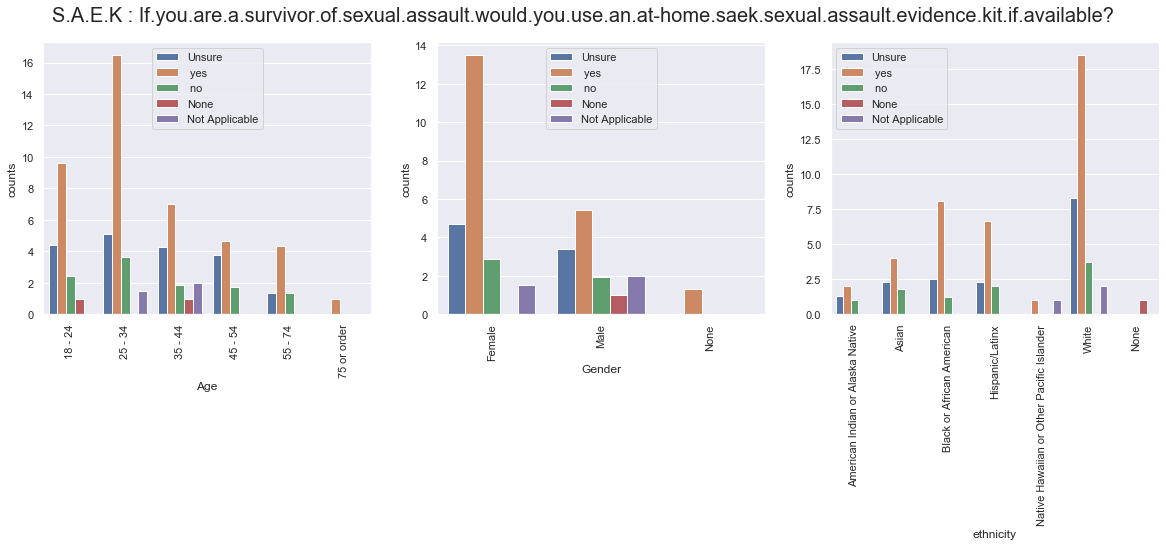

In [572]:
for col in sa:
    data=create_df(col)
    plot_data(data,'S.A.E.K')

#  Statistical Tests

## Pearson’s Chi-Squared Test
`The Pearson’s chi-squared statistical hypothesis is a test for independence between categorical variables.`
- If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
- If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.


In [648]:
from scipy import stats 
from scipy.stats import chi2_contingency
import statistics as st
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [643]:
age_gender=pd.DataFrame(new_df.groupby(['what.gender.do.you.identify.as?'])['age'].value_counts())
age_gender.columns=['counts']
age_gender=age_gender.reset_index()

In [641]:
table = pd.pivot_table(age_gender, values='counts', index=['what.gender.do.you.identify.as?'],
                    columns=['age']).fillna(value=0) 
table

age,18 - 24,25 - 34,35 - 44,45 - 54,55 - 74,75 or order
what.gender.do.you.identify.as?,,,,,,
Female,126.0,183.0,87.0,30.0,15.0,1.0
Male,27.0,74.0,33.0,20.0,6.0,0.0
None,1.0,2.0,1.0,0.0,0.0,0.0


In [649]:
stat, p, dof, expected= chi2_contingency(table)

In [650]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [651]:

alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
